In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### **Preprocessing**

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 
               'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

df = pd.read_csv('magic04.data', names=column_names)

df['class'] = df['class'].map({'g': 1, 'h': 0})

print("Missing values in each column:")
print(df.isnull().sum())

print("\nDataset Information:")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Class distribution:\n{df['class'].value_counts(normalize=True).mul(100).round(2)}")

print("\nSummary Statistics:")
print(df.describe())

X = df.drop('class', axis=1)
y = df['class']

# 70% train 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Missing values in each column:
fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

Dataset Information:
Number of samples: 19020
Number of features: 10
Class distribution:
class
1    64.84
0    35.16
Name: proportion, dtype: float64

Summary Statistics:
            fLength        fWidth         fSize         fConc        fConc1  \
count  19020.000000  19020.000000  19020.000000  19020.000000  19020.000000   
mean      53.250154     22.180966      2.825017      0.380327      0.214657   
std       42.364855     18.346056      0.472599      0.182813      0.110511   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863800      2.477100      0.235800      0.128475   
50%       37.147700     17.139900      2.739600      0.354150      0.196500   
75%       70.122175     24.739475      3.101600      0.503700      0.285225  

Pairplot

Generating pairplot...


<Figure size 2000x1500 with 0 Axes>

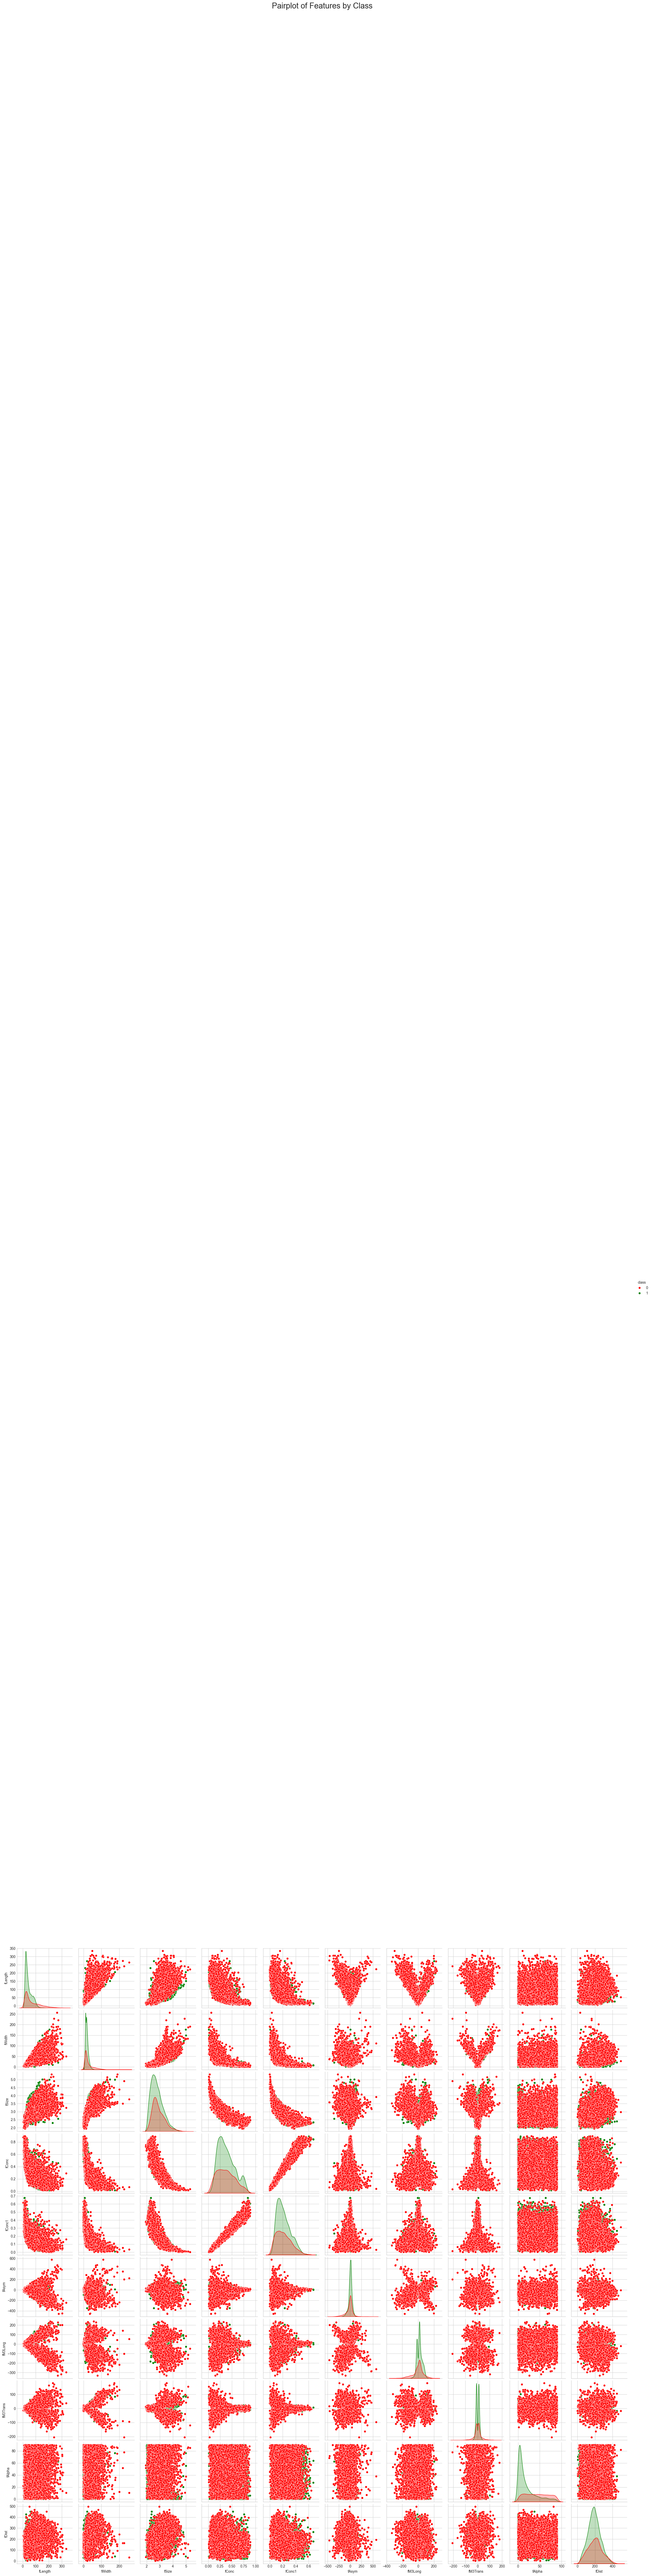

In [3]:
plt.figure(figsize=(20, 15))
print("Generating pairplot...")
sns.pairplot(df, hue='class', vars=column_names[:-1], palette=['red', 'green'])
plt.suptitle('Pairplot of Features by Class', y=4.02, fontsize=22)
plt.savefig('pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

### **Exploratory Analysis and Visualization**

#### Correlation heatmap

In [4]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)
plt.show()

#### Distribution of features by class

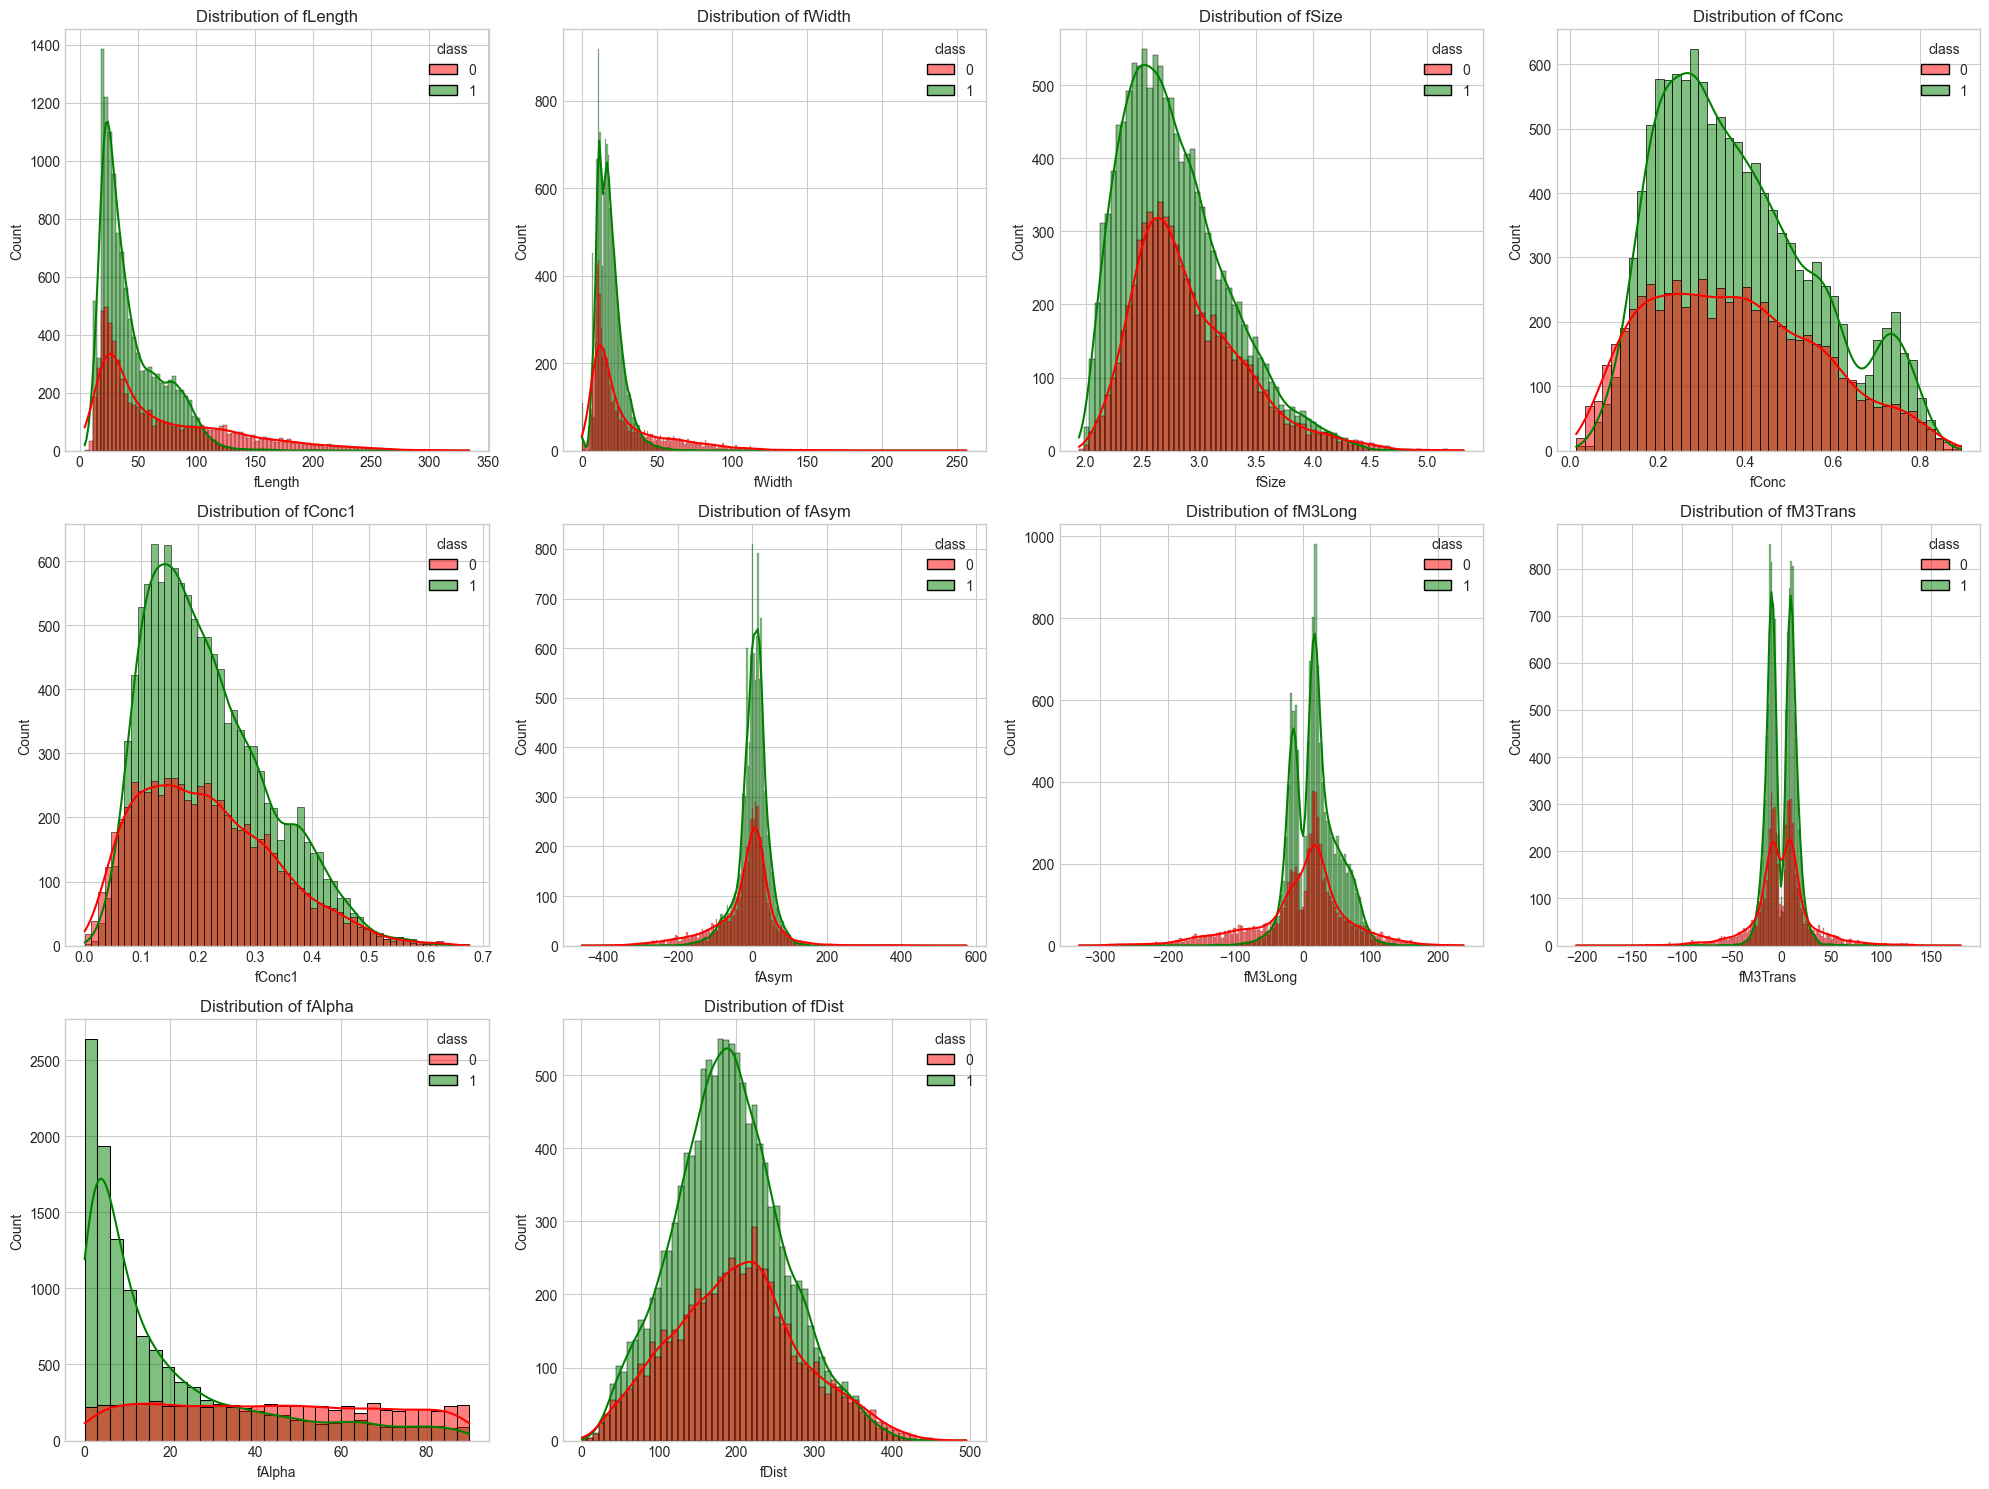

In [5]:
# Distribution of features by class
plt.figure(figsize=(20, 15))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=df, x=feature, hue='class', kde=True, palette=['red', 'green'])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300)
plt.show()

#### Box plots for each feature by class

<positron-console-cell-6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<positron-console-cell-6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<positron-console-cell-6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<positron-console-cell-6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<positron-console-cell-6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

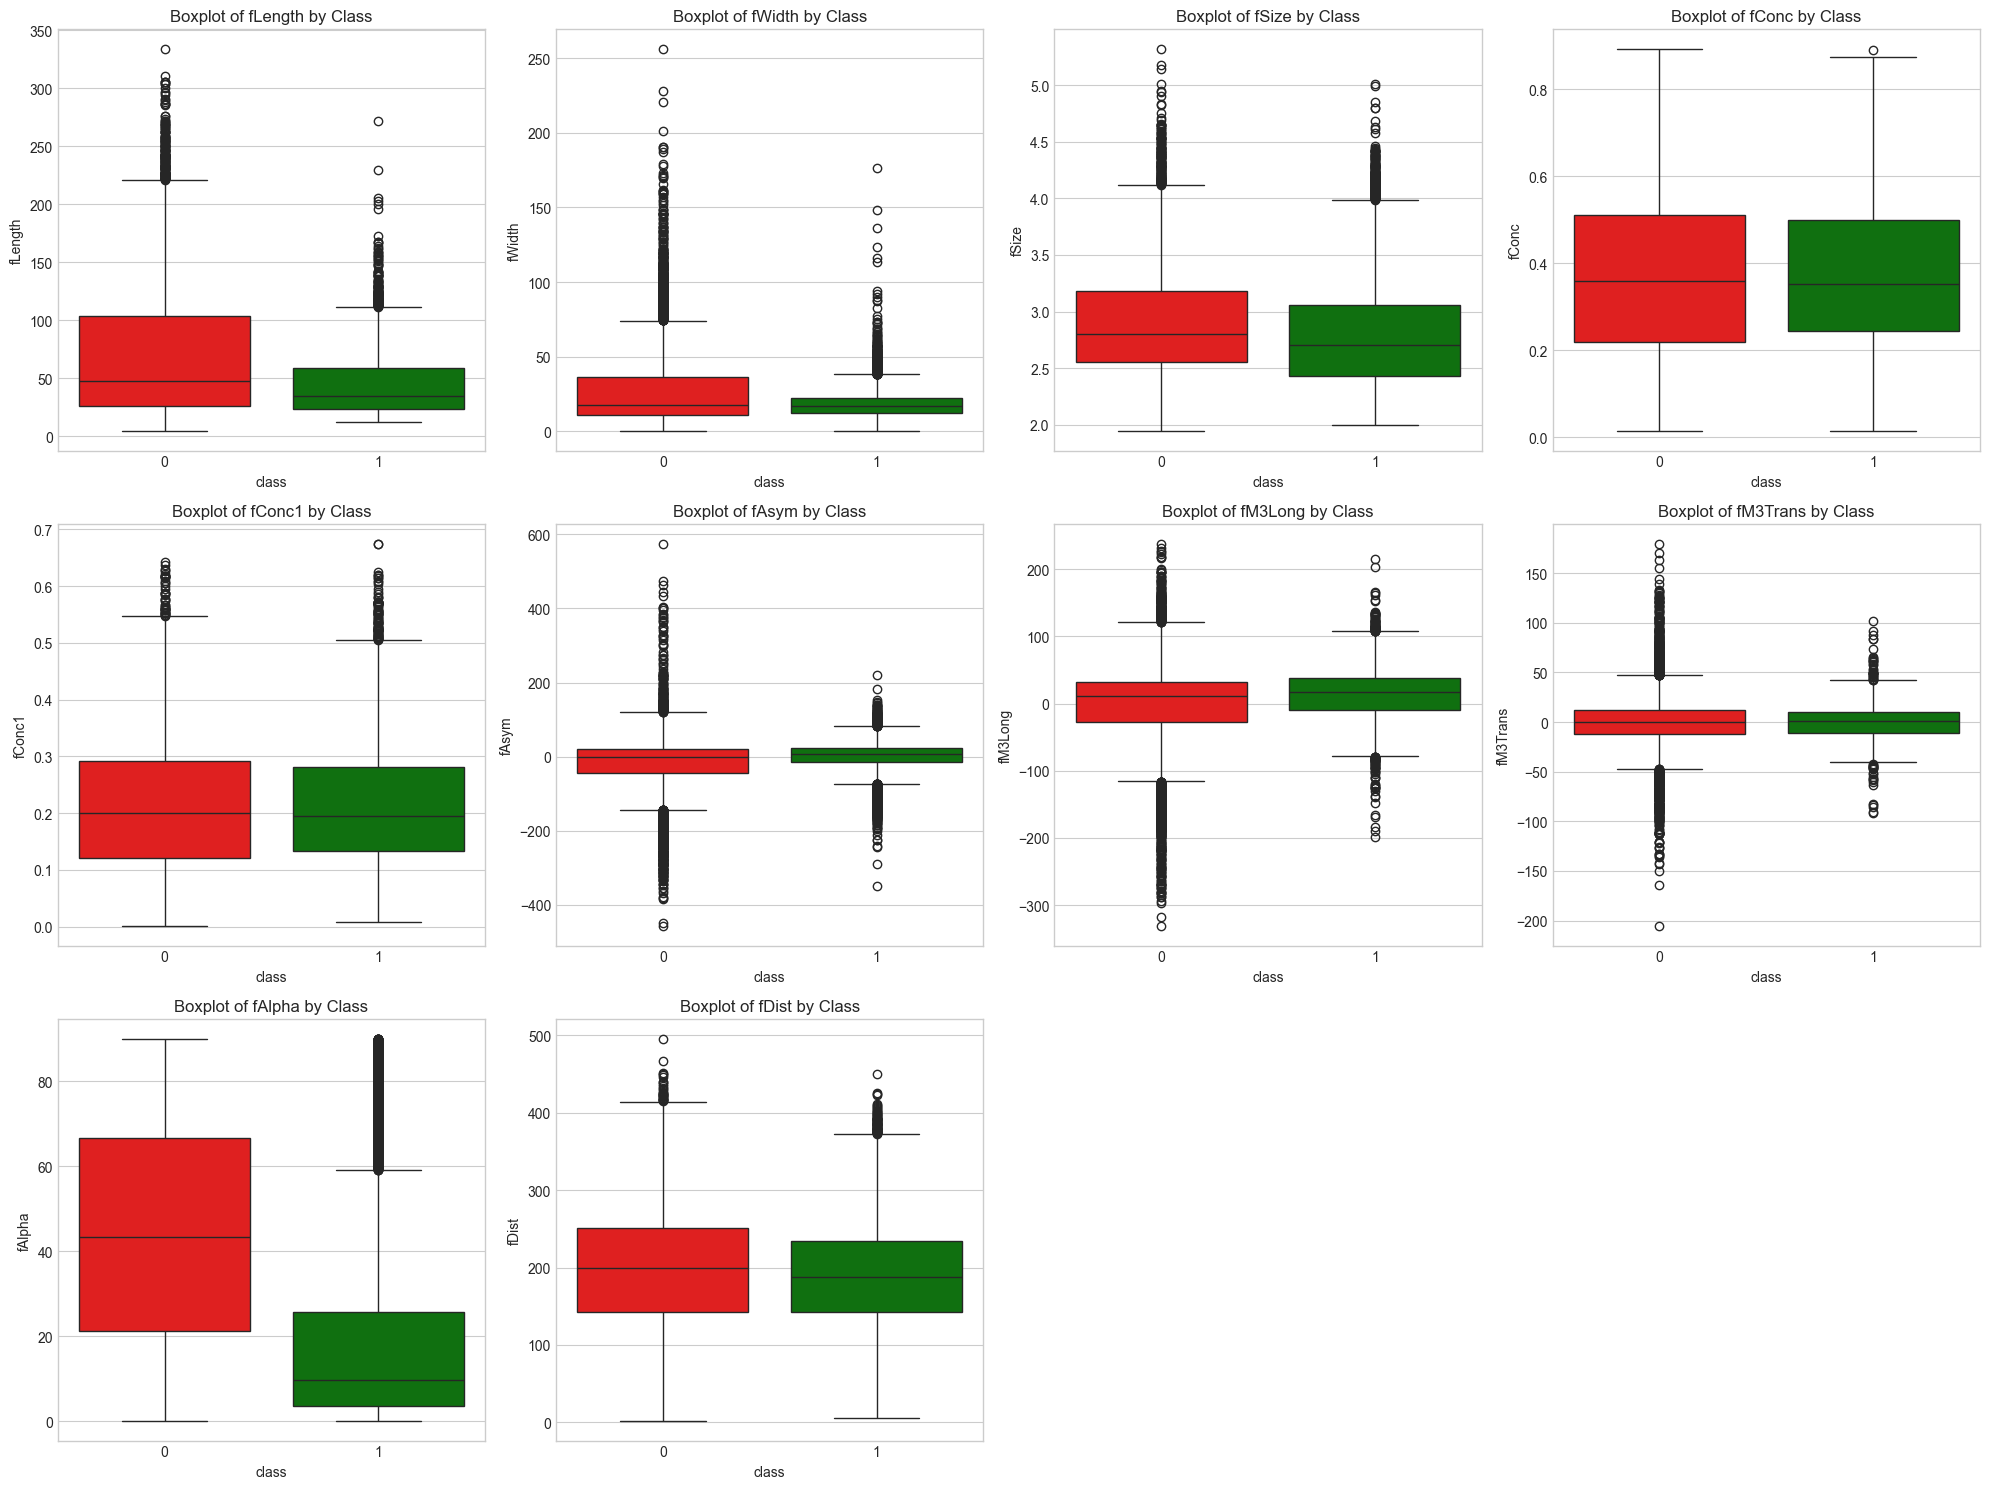

In [6]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(column_names[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='class', y=feature, data=df, palette=['red', 'green'])
    plt.title(f'Boxplot of {feature} by Class')
plt.tight_layout()
plt.savefig('boxplots.png', dpi=300)
plt.show()

#### Principal Component Analysis

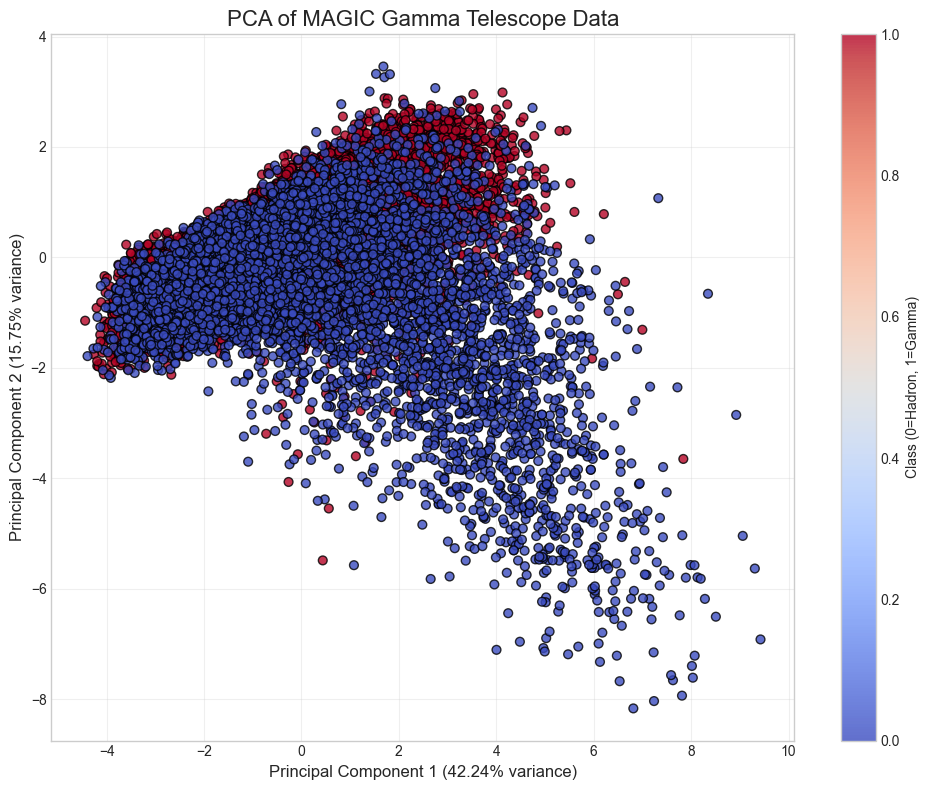

PCA explained variance ratio: [0.42239909 0.15751879]
Total variance explained: 57.99%


In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.8, edgecolor='k', s=40)
plt.title('PCA of MAGIC Gamma Telescope Data', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
plt.colorbar(scatter, label='Class (0=Hadron, 1=Gamma)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_plot.png', dpi=300)
plt.show()

print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

#### t-SNE plot for visualization

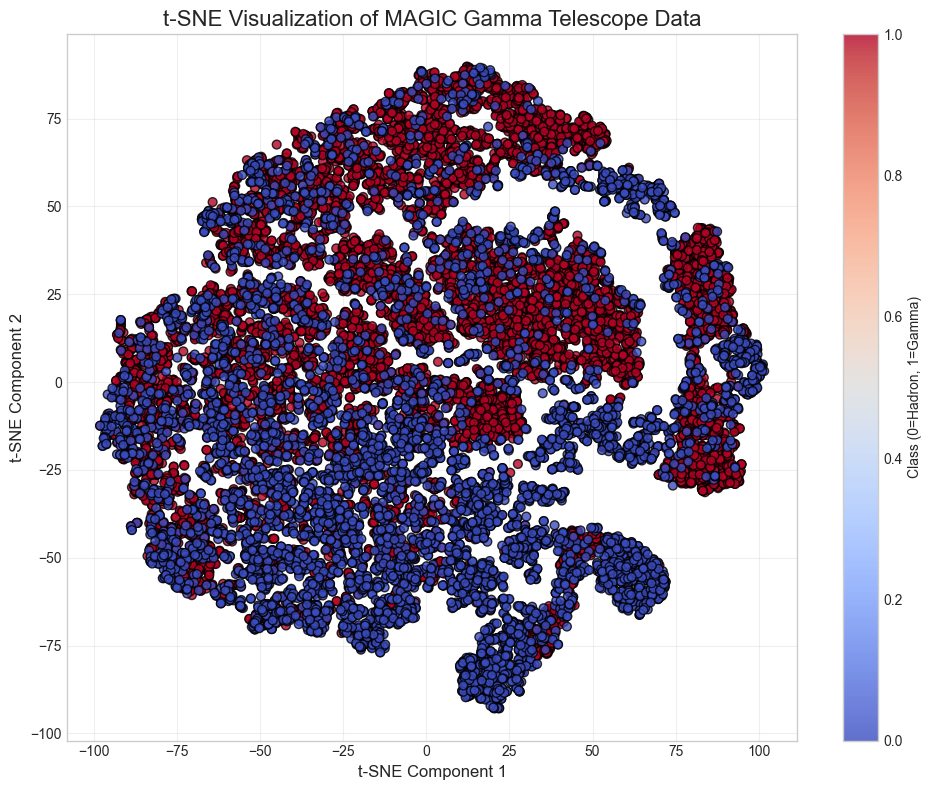

In [8]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(StandardScaler().fit_transform(X))

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', alpha=0.8, edgecolor='k', s=40)
plt.title('t-SNE Visualization of MAGIC Gamma Telescope Data', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.colorbar(scatter, label='Class (0=Hadron, 1=Gamma)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tsne_plot.png', dpi=300)
plt.show()

#### KMeans clustering to check if unsupervised learning can identify the classes

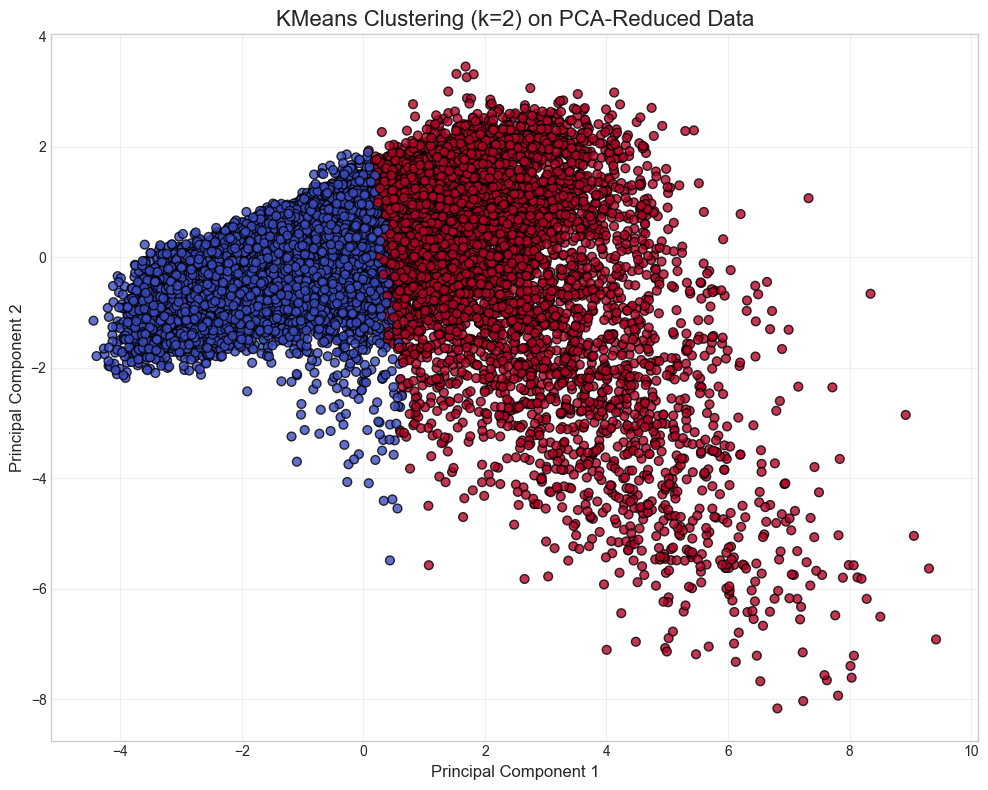

In [9]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(StandardScaler().fit_transform(X))

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='coolwarm', alpha=0.8, edgecolor='k', s=40)
plt.title('KMeans Clustering (k=2) on PCA-Reduced Data', fontsize=16)
plt.xlabel(f'Principal Component 1', fontsize=12)
plt.ylabel(f'Principal Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('kmeans_plot.png', dpi=300)
plt.show()

Check how well KMeans clusters align with actual classes

In [10]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
print(f"KMeans clustering evaluation:")
print(f"Adjusted Rand Index: {adjusted_rand_score(y, kmeans_labels):.4f}")
print(f"Normalized Mutual Information: {normalized_mutual_info_score(y, kmeans_labels):.4f}")

KMeans clustering evaluation:
Adjusted Rand Index: 0.0066
Normalized Mutual Information: 0.0016


#### Feature importance based on variance

In [11]:
feature_variance = X.var().sort_values(ascending=False)
print("\nFeature Importance based on Variance:")
print(feature_variance)


Feature Importance based on Variance:
fDist       5584.839983
fAsym       3505.357776
fM3Long     2601.012037
fLength     1794.780934
fAlpha       681.399004
fM3Trans     433.782213
fWidth       336.577782
fSize          0.223349
fConc          0.033421
fConc1         0.012213
dtype: float64
